# Agents: Lab 1

In [1]:
from IPython.core.display import HTML
css_file = 'https://raw.githubusercontent.com/ngcm/training-public/master/ipython_notebook_styles/ngcmstyle.css'
HTML(url=css_file)

## Conway's Game of Life

A simple agent model is [Conway's Game of Life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life), which is an example of [Cellular automota](https://en.wikipedia.org/wiki/Cellular_automaton). A two-dimensional square grid of cells are either "dead" or "alive". At each iteration, each cell checks its neighbours (including diagonals: each cell has 8 neighbours).

* Any live cell with fewer than two live neighbours dies ("under-population")
* Any live cell with two or three neighbours lives ("survival")
* Any live cell with four or more neighbours dies ("over-population")
* Any dead cell with *exactly* three neigbours lives ("reproduction")

At the boundaries of the grid periodic boundary conditions are imposed.

Write a function that takes a `numpy` array representing the grid. Test it on some of the [standard example patterns](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life#Examples_of_patterns). The `matplotlib` `imshow` function, and the [matplotlib `FuncAnimation`](http://matplotlib.org/examples/animation/dynamic_image.html) function may help; if running in the notebook, the [instructions on installing and using ffmpeg and html5](https://github.com/numerical-mooc/numerical-mooc/blob/master/lessons/02_spacetime/02_03_1DDiffusion.ipynb) may also be useful.

In [2]:
%matplotlib inline
import numpy
from matplotlib import pyplot, animation

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (12,6)

from __future__ import division

In [3]:
def conway_iteration(grid):
    """
    Take one iteration of Conway's game of life.
    
    Parameters
    ----------
    
    grid : array
        (N+2) x (N+2) numpy array representing the grid (1: live, 0: dead)
    
    """
    
    # Code to go here
    
    return grid

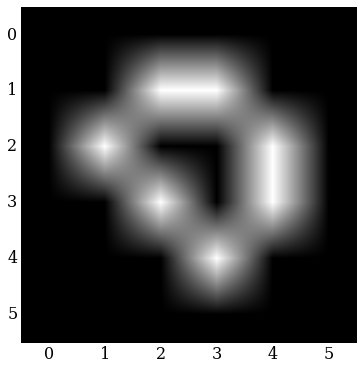

In [4]:
# Try the loaf - this is static

grid_loaf = numpy.array([[0,0,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0,0],
                         [0,0,0,1,1,0,0,0],
                         [0,0,1,0,0,1,0,0],
                         [0,0,0,1,0,1,0,0],
                         [0,0,0,0,1,0,0,0],
                         [0,0,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0,0]])

fig = pyplot.figure()
im = pyplot.imshow(grid_loaf[1:-1,1:-1], cmap=pyplot.get_cmap('gray'))

def init():
    im.set_array(grid_loaf[1:-1,1:-1])
    return im,

def animate(i):
    conway_iteration(grid_loaf)
    im.set_array(grid_loaf[1:-1,1:-1])
    return im,

# This will only work if you have ffmpeg installed

anim = animation.FuncAnimation(fig, animate, init_func=init, interval=50, frames=10, blit=True)

In [5]:
HTML(anim.to_html5_video())

Create some random $256 \times 256$ grids and see what behaviour results.

## Cellular Automata

The Game of Life is an example of *cellular automata*: a "grid" containing cells representing some model is updated in discrete timesteps according to some rules, usually involving neighbouring cells. Each cell can be thought of as an independent player of the game - an agent - that interacts through its neighbours in order to evolve.

As an example of a cellular automata model, consider traffic flow. A road is modelled as a grid with one spatial dimension containing $N$ cells. The cell either contains a car (has value $1$) or doesn't (has value $0$). If the space in front of the car is empty it moves forwards; if not, it stays where it is. Periodic boundary conditions are used. We phrase this in terms of "road locations" $R_i^n$, so that $R_i^{n+1} = 0$ except for:

\begin{align}
  R_i^{n+1} & = 1 & \text{if $R_i^n=1$ and $R_{i+1}^n=1$ (car does not move), or} \\
  R_i^{n+1} & = 1 & \text{if $R_{i-1}^n=1$ and $R_i^n=0$ (car moves forwards)}.
\end{align}

A useful diagnostic quantity for this model is the *average velocity*; the number of cars that moved in one step divided by the total number of cars on the road.

### Initial data and density

For initial data, we choose the *density* of cars on the road to be between $0$ and $1$. Then, for each grid cell, compute uniform random numbers for each cell and initialize the cell according to the density:

### Evolution

Construct "roads" as above and evolve according to the update rule. See how the average velocity behaves. Test the limiting cases. Plot the behaviour of the average velocity against the density: can you understand why it behaves this way? If needed, plot the late time locations of the "cars".

### Making it more complex

Consider adding another lane to the road. The grid becomes a $N \times 2$ array. The "fast" lane can take one additional step every $k$ steps (eg, if the fast lane is going $10$% faster, then every tenth step the fast lane takes two timesteps instead of one).

We now need to add rules to change lane. Denote cells in the fast lane by $F^n_i$, and in the slow lane by $S^n_i$. Consider a "polite" overtaking move: if $S^n_i=1$ and $S^n_{i+1}=1$ then the car at $S^n_i$ will overtake (move to $F^{n+1}_{i+1}$) *only* if there are no cars in its way ($F^n_{i} = 0 = F^n_{i+1}$) *and* if it will not block a car in the fast lane ($F^n_{i-1}=0$). It will also move back into the slow lane in the same circumstances: if a car in the fast lane at $F^n_{i}=1$ is not blocked by, or blocking, any slow lane cars, ie $0 = S^n_i = S^n_{i+1} = S^n_{i-1}$.

Initialize the slow lane only with a certain density of cars. Investigate how the what the average *density* of cars in the fast and slow lane looks like, depending on the initial density.